<a href="https://colab.research.google.com/github/jayabban/Data-Science/blob/main/ROC_Feature_Selection%26scaling_Data_Minning_LRG_Diabeties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Diabetes Dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Dataset : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Loading the Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle Dataset/diabetes.csv')

Data Exploration

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values in our dataset

In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
df.duplicated().sum()

0

There are no duplicates in our data set

Visualization

In [12]:
correlation = df.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: title={'center': 'Correlation Map'}>

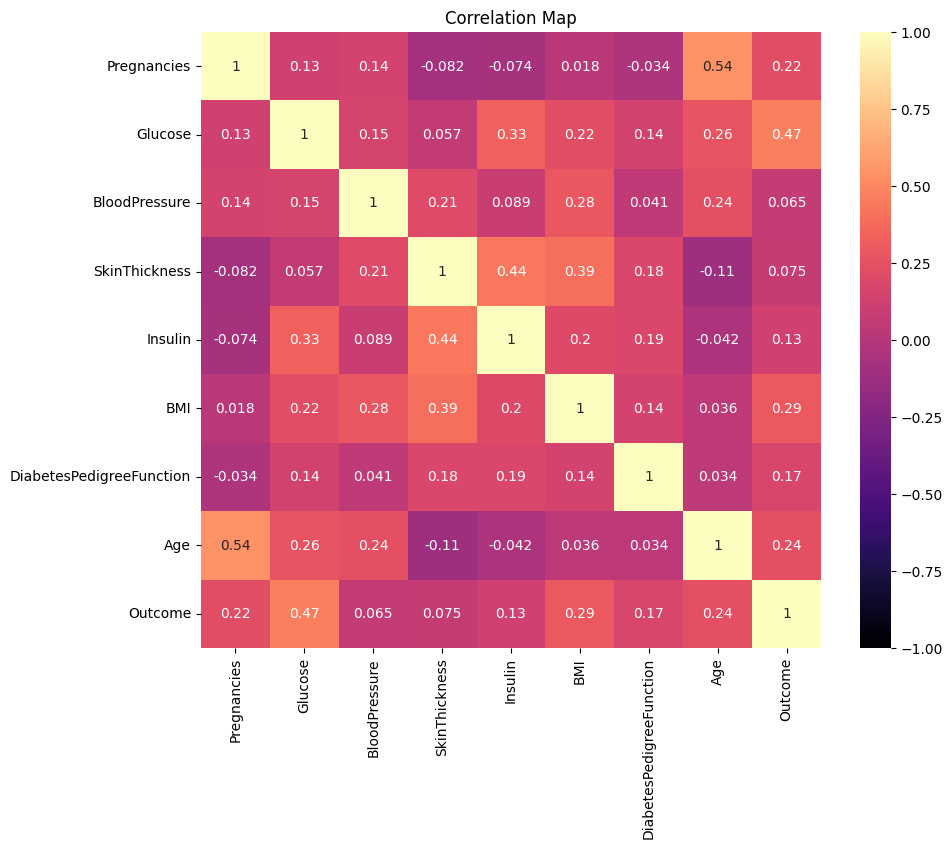

In [13]:
plt.figure(figsize=(10,8))
plt.title("Correlation Map")
sns.heatmap(correlation, annot=True, cmap='magma', vmin=-1, vmax=1)

<Axes: xlabel='Age', ylabel='Pregnancies'>

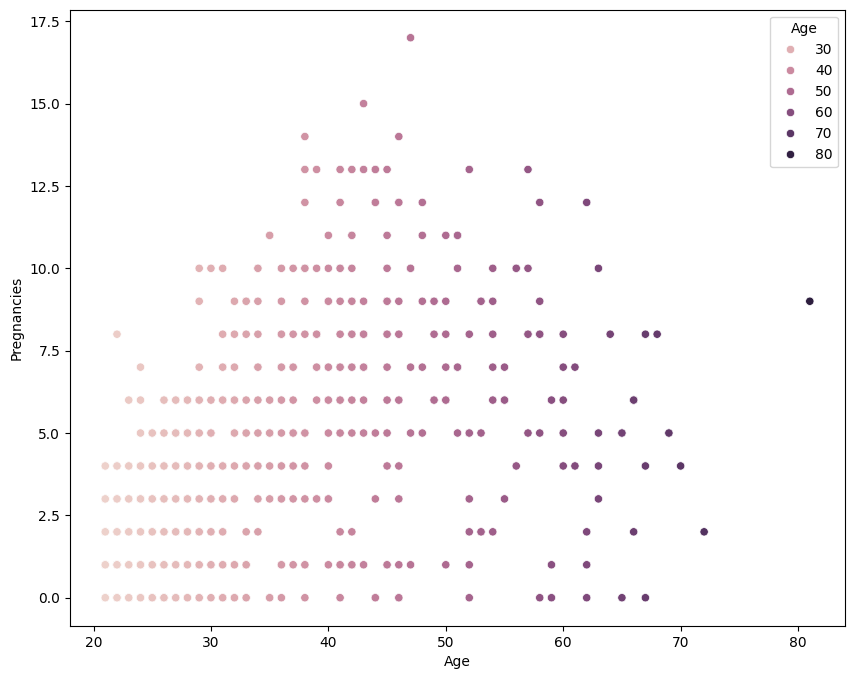

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.Age, y=df.Pregnancies, hue=df.Age)

<Axes: ylabel='Glucose'>

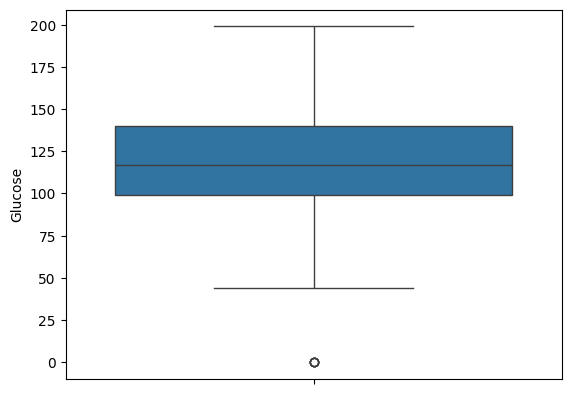

In [15]:
sns.boxplot(df['Glucose'])

<Axes: ylabel='Pregnancies'>

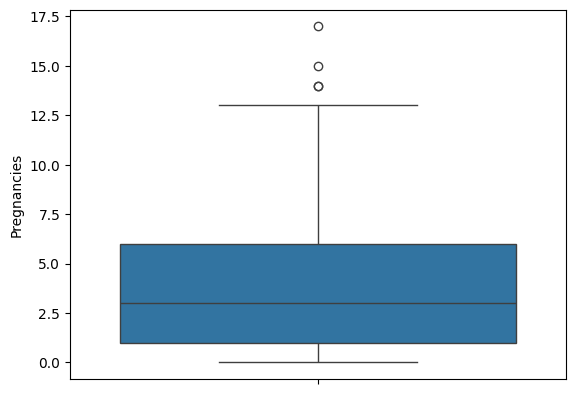

In [16]:
sns.boxplot(df['Pregnancies'])

In [17]:
out = df.Outcome.value_counts()
out

0    500
1    268
Name: Outcome, dtype: int64

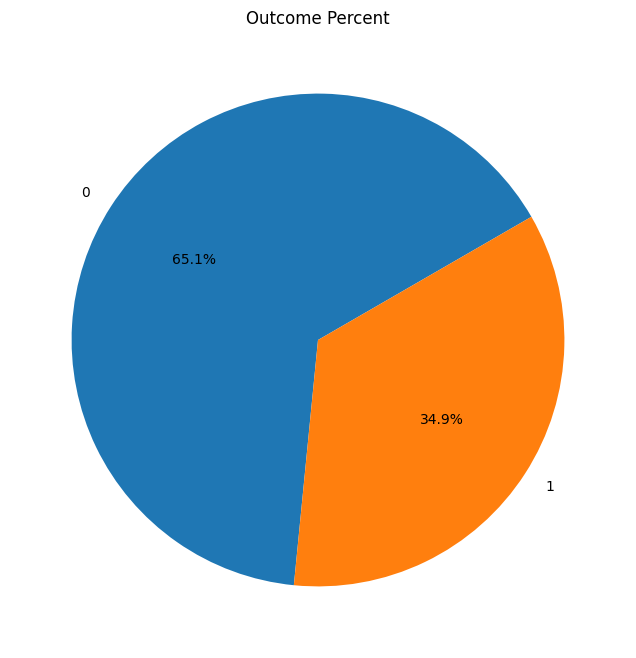

In [18]:
plt.figure(figsize=(10,8))
plt.pie(out, labels= out.index, autopct='%1.1f%%', startangle=30)
plt.title("Outcome Percent")
plt.show()

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Feature Selection & Normalization

In [20]:
col_norm = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']

In [21]:
df1_norm = df[col_norm].apply(lambda x: ( (x - x.min()) / (x.max()- x.min())))

In [22]:
df1_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638


# Split_Data X & y

In [23]:
X = df1_norm
y = df['Outcome']

# Feature Selection

In [24]:
feat_Preg = tf.feature_column.numeric_column('Pregnancies')
feat_Glu = tf.feature_column.numeric_column('Glucose')
feat_Blood = tf.feature_column.numeric_column('BloodPressure')
feat_Skin = tf.feature_column.numeric_column('SkinThickness')
feat_Insu = tf.feature_column.numeric_column('Insulin')
feat_BMI = tf.feature_column.numeric_column('BMI')
feat_Ped = tf.feature_column.numeric_column('DiabetesPedigreeFunction')

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [25]:
feat_cols = [feat_Preg,feat_Glu,feat_Blood,feat_Skin,
             feat_Insu,feat_BMI,feat_Ped]

## Splitting into the Test and Trainning set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Trainning the Model

**SVM Classifier**

In [27]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

In [28]:
svm_pred = model_SVC.predict(X_test)
print('Accuracy: ', model_SVC.score(X_test, y_test) * 100)

Accuracy:  79.87012987012987


In [29]:
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test, svm_pred)
print(svm_cm)

[[96 11]
 [20 27]]


Text(50.722222222222214, 0.5, 'Actual')

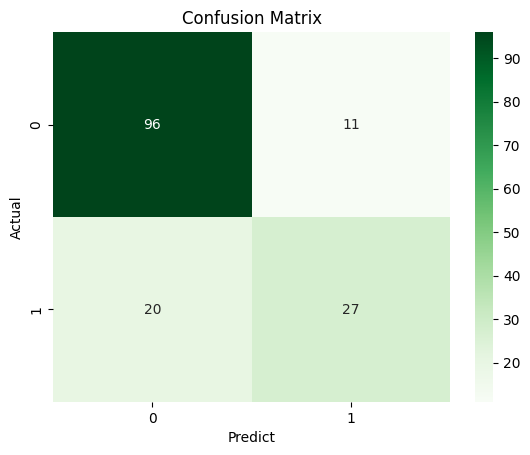

In [30]:
ax = sns.heatmap(svm_cm, annot=True, fmt='d',cmap='Greens')
plt.title("Confusion Matrix")
ax.set_xlabel("Predict")
ax.set_ylabel("Actual")

**Logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_pred_curve = log_reg.decision_function(X_test)

In [34]:
log_pred = log_reg.predict(X_test)
print('Accuracy: ', log_reg.score(X_test, y_test) * 100)

Accuracy:  83.11688311688312


In [35]:
log_pred_acc = print('Accuracy: ', log_reg.score(X_test, y_test) * 100)
log_pred_acc

Accuracy:  83.11688311688312


In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log_pred)
print(cm)

[[100   7]
 [ 19  28]]


Text(50.722222222222214, 0.5, 'Actual')

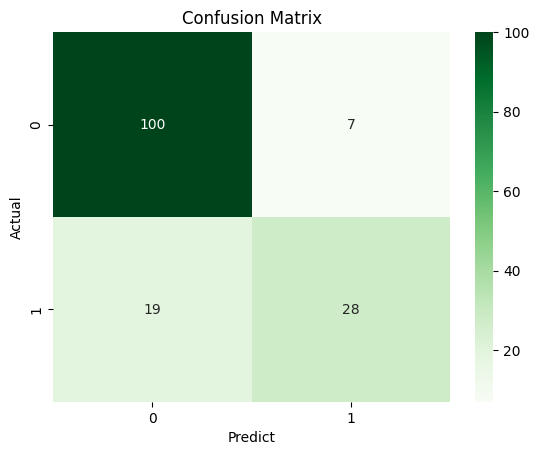

In [37]:
ax = sns.heatmap(cm, annot=True, fmt='d',cmap='Greens')
plt.title("Confusion Matrix")
ax.set_xlabel("Predict")
ax.set_ylabel("Actual")

**ROC CURVE & AUC**

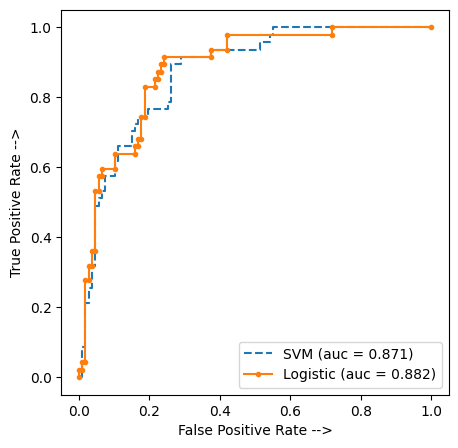

In [38]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, log_pred_curve)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='--', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

# **Conclusion**

So out of the 154 X_test Dataset, 128 were predicted correctly & 26 were predicted wrong. 100 were predicted not having diabeties while 7 was misclassified. 28 were predicted to have diabeties while 19 was misclassified not to have diabeties.

Observation : The Logistic Regression algorithm was best in terms of the Roc curve and auc. In my previous Logistic Regression Model, the outcome was 78% because i didnt apply any feature scaling technique. The model improved after applying feature scaling and also normalizing my dataset. The total accuracy increased to 83%.

Conclusion : Applying feature scaling and also leveraging on feature selection can help improve your model.